In [34]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from google.colab import drive
drive.mount('/content/drive')
HOME_PATH = '/content/drive/MyDrive/Colab Notebooks/baby-steps-of-rl-ja/exercise/day_3'
sys.path.append(HOME_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import math
from collections import defaultdict
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

# モンテカルロエージェントの定義

In [37]:
class MonteCarloAgent(ELAgent):   # el_agentのクラスを引き継ぐ

  def __init__(self, epsilon=0.1):
    super().__init__(epsilon)

  def learn(self, env, episode_count=1000, gamma=0.9, render=False, report_interval=50):
    self.init_log()
    # defaultdictを用いて行動の種類だけ0の並ぶ配列を初期値にもつ
    self.Q = defaultdict(lambda: [0] * len(actions))    # 状態 x 行動の価値マトリクス
    N = defaultdict(lambda: [0] * len(actions))         # 状態 x 行動の試行回数
    actions = list(range(env.action_space.n))

    for e in range(episode_count):
      s = env.reset()
      is_done = False
      # エピソードの終了まで試行する
      experience = []
      while not is_done:
        if render:
          env.render()
        a = self.policy(s, actions)
        n_state, reward, is_done, info = env.step(a)
        experience.append({"state": s, "action": a, "reward": reward})    # 状態 x 行動毎に報酬を記録する
        s = n_state
      else:   # while文が終了した後に実行される。breakがなければelse無しで書くのと変わらない。見た目の問題
        self.log(reward)

      # 各状態と行動を評価する
      for i, x in enumerate(experience):
        s, a = x["state"], x["action"]

        # 時刻i時点での状態sのディスカウントされた将来の報酬を計算する
        G, t = 0, 0     # 合計の報酬と時間
        for j in range(i, len(experience)):   # 時刻i以降の報酬を時間割引を行いながら加算する
          G += math.pow(gamma, t) * experience[j]["reward"]
          t += 1

        N[s][a] += 1  # 状態 x 行動毎の数
        alpha = 1 / N[s][a]
        self.Q[s][a] += alpha * (G - self.Q[s][a])      # 将来にわたる報酬の合計と現在の推計値の差で推計値を更新する（状態 x 行動毎に平均値をとる）

      if e != 0 and e % report_interval == 0:
        self.show_reward_log(episode=e)

# トレーニング

In [38]:
def train():
  agent = MonteCarloAgent(epsilon=0.1)
  env = gym.make("FrozenLakeEasy-v0")
  agent.learn(env, episode_count=500)
  show_q_value(agent.Q)
  agent.show_reward_log()

At Episode 50 average reward is 0.0 (+/-0.0).
At Episode 100 average reward is 0.8 (+/-0.4).
At Episode 150 average reward is 0.84 (+/-0.367).
At Episode 200 average reward is 0.88 (+/-0.325).
At Episode 250 average reward is 0.92 (+/-0.271).
At Episode 300 average reward is 0.84 (+/-0.367).
At Episode 350 average reward is 0.9 (+/-0.3).
At Episode 400 average reward is 0.88 (+/-0.325).
At Episode 450 average reward is 0.92 (+/-0.271).


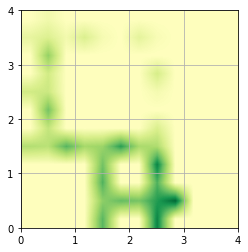

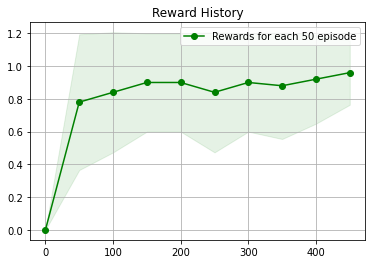

In [ ]:
agent = train()